# Lab 2: The Mine Crafting

In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.integrate import solve_ivp 
import math

# constants
G = 6.6743E-11 #m^3/kg/s^2
g0 = 9.81 #m/s^2
me = 5.972E24 #kg
mm = 7.35E22 #kg
re = 6.3781e6
rm = 1.7381e6 #km
rre = 7.272E5 #rad/s

## Part 1

$y = \frac{1}{2} g t^2$

$t = \sqrt{\frac{2y}{g}} = \sqrt{\frac{2 * 4000}{9.81}} = 28.56s$

Analytic solution: 28.556862 seconds
Numerical Solution: 28.556862 seconds
The analytic and numerical solutions are very similar, as expected.


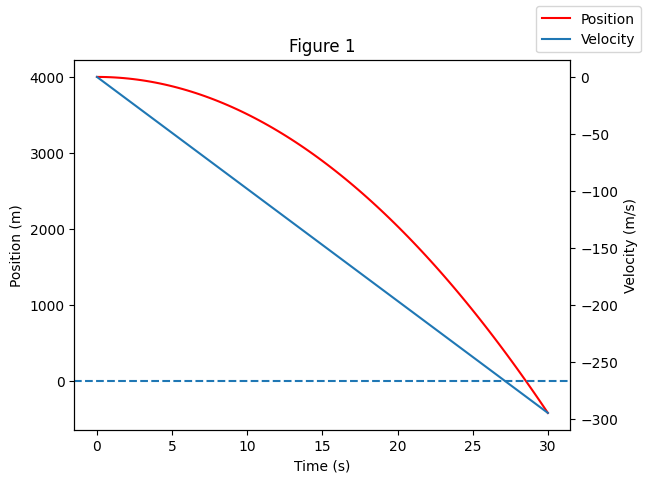

In [58]:
# Analytic solution (no drag)
def analytic_solution(y):
    return np.sqrt(2 * y / g0)

analytic = analytic_solution(4000)
print(f'Analytic solution: {analytic:.6f} seconds')

def equation(t,d,a,g0,gamma):
    y,v = d
    dydt = v
    dvdt = -g0+a*(v**gamma)
    return [dydt,dvdt] 


def endpoint(t,d,a,g0,gamma):
    y,v = d
    return y
sol = solve_ivp(equation, (0,30), [4000,0], args=(0,g0,2), t_eval = np.linspace(0,30,101),events=endpoint)

y = sol.y[0] 
v = sol.y[1] 
t = sol.t 

fig,ax = plt.subplots() 
ax1 = ax.twinx() 
ax.plot(t,y,'red',label='Position'); 
ax1.plot(t,v,label='Velocity'); 
ax.axhline(0.0,linestyle='--')
ax.set_xlabel("Time (s)"); 
ax.set_ylabel("Position (m)"); 
ax1.set_ylabel("Velocity (m/s)")
ax.set_title("Figure 1")
fig.legend()

numerical = sol.t_events[0][0] 
print(f"Numerical Solution: {numerical:.6f} seconds") 
print("The analytic and numerical solutions are very similar, as expected.")

## Part 2

Making gravity height-dependent makes the solution 28.556864 seconds
This solution is slightly smaller than the solution calculated earlier, 
that was 28.556862 seconds.


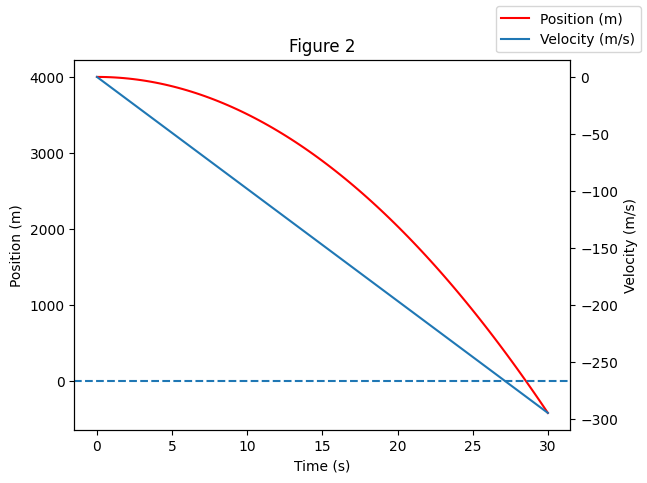

In [59]:
def radEquation(t,d,a,g0,gamma,r):
    y,v = d
    dydt = v
    g = (g0 * ((r+y-4000)/r))
    dvdt = -g+a*(v**gamma)
    return [dydt,dvdt] 

def endpoint(t,d,a,g0,gamma,r):
    y,v = d
    return y

sol = solve_ivp(radEquation, (0,30), [4000,0], args = (0,g0,2,re*1000),t_eval=np.linspace(0,30,101),events = endpoint)

y = sol.y[0]
v = sol.y[1]
t = sol.t

fig, ax = plt.subplots()
ax.plot(t,y,'red', label = "Position (m)")
ax1 = ax.twinx()
ax1.plot(t,v,label = "Velocity (m/s)")

ax.set_xlabel("Time (s)")
ax.set_ylabel("Position (m)")
ax1.set_ylabel("Velocity (m/s)")
ax.set_title("Figure 2")

ax.axhline(0.0,linestyle='--')
fig.legend()

solution = sol.t_events[0][0]
print(f"Making gravity height-dependent makes the solution {solution:.6f} seconds")
print(f"This solution is slightly smaller than the solution calculated earlier, \nthat was {numerical:.6f} seconds.")

Making alpha ore relativistic results in the solution being 47.380262 seconds, 
which is much larger than the original value calculated with no drag. The time 
calculated increases exponentially as alpha increases.


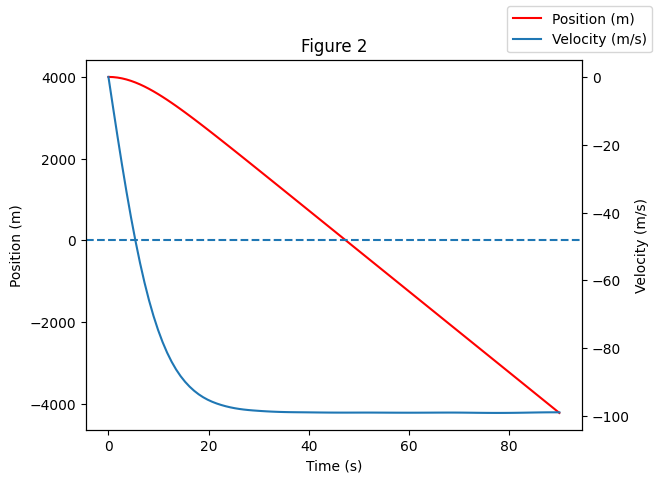

In [60]:
sol = solve_ivp(radEquation, (0,90), [4000,0], args = (0.001,g0,2,re*1000),t_eval=np.linspace(0,90,101),events = endpoint)

y = sol.y[0]
v = sol.y[1]
t = sol.t

fig, ax = plt.subplots()
ax.plot(t,y,'red', label = "Position (m)")
ax1 = ax.twinx()
ax1.plot(t,v,label='Velocity (m/s)')

ax.set_xlabel("Time (s)")
ax.set_ylabel("Position (m)")
ax1.set_ylabel("Velocity (m/s)")
ax.set_title("Figure 2")

ax.axhline(0.0,linestyle='--')
fig.legend()

solution = sol.t_events[0][0]
print(f"Making alpha ore relativistic results in the solution being {solution:.6f} seconds, \nwhich is much larger than the original value calculated with no drag. The time \ncalculated increases exponentially as alpha increases.")

## Part 3

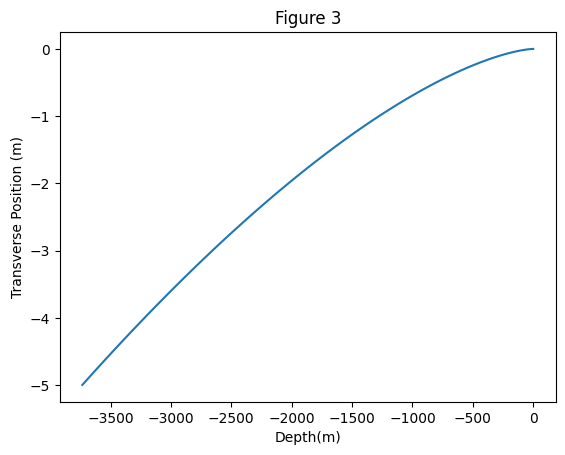

In [61]:
#Part(a)
def dragproj_2(t,s,a,g0,gamma,Re,omega):
    yx,yy,vx,vy = s
    dyxdt = vx 
    dyydt = vy
    g = (g0*((Re+yy-4000)/Re)) 
    dvxdt = 2*omega*vy 
    dvydt = -g+a*(np.abs(vy)**gamma) - 2*omega*vx 
    return [dyxdt,dyydt,dvxdt,dvydt] 

omega  = 7.272e-5 
def reaching(t,s,a,g0,gamma,Re,omega):
    yx,yy,vx,vy = s
    return yx 

a=0
yx0 = 0
yy0 = 0 
vx0 = 0 
vy0 = 0
tf = 30
def bottom(t,s,a,g0,gamma,Re,omega):
    yx,yy,vx,vy = s 
    return yy-4000

def wall(t,s,a,g0,gamma,Re,omega):
    yx,yy,vx,vy = s 
    return yx +5 

bottom.terminal = True 
wall.terminal = True 
t = np.linspace(t0,tf,n)
soln = solve_ivp(fun = dragproj_2,
                          t_span=(0,tf), # tuple
                          y0=[yx0,yy0,vx0,vy0], #as an arrray
                          args=(a,g0,2,re,omega),
                          t_eval = t ,events=[bottom,wall]
                      ) 
yx,yy,vx,vy = soln.y[0],soln.y[1],soln.y[2],soln.y[3]
t = soln.t 

fig,ax = plt.subplots() 
ax.plot(yy,yx) 
ax.set_xlabel("Depth(m)") 
ax.set_ylabel("Transverse Position (m)") 
ax.set_title("Figure 3"); 


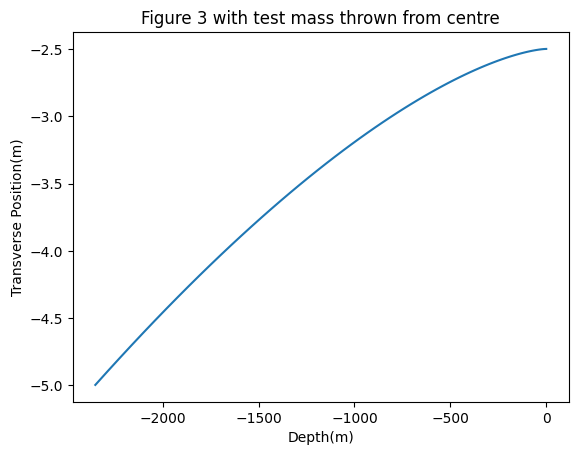

In [62]:
yx0 = -2.5
yy0 = 0
vx0 = 0 
vy0 = 0
tf = 30 
soln = solve_ivp(fun = dragproj_2,
                          t_span=(0,tf), # tuple
                          y0=[yx0,yy0,vx0,vy0], #as an arrray
                          args=(a,g0,2,re,omega),
                          t_eval = t ,events=[bottom,wall]
                      ) 
yx,yy,vx,vy = soln.y[0],soln.y[1],soln.y[2],soln.y[3]
t = soln.t 
fig,ax = plt.subplots() 
ax.plot(yy,yx,label="Transverse Position(m)") 
ax.set_xlabel("Depth(m)") 
ax.set_ylabel("Transverse Position(m)") 
ax.set_title("Figure 3 with test mass thrown from centre"); 

In [50]:
print("As it is clear from the graph, the test mass hits the bottom before reaching the bottom of the shaft is only able to reach 2500m down the shaft")

As it is clear from the graph, the test mass hits the bottom before reaching the bottom of the shaft is only able to reach 2500m down the shaft


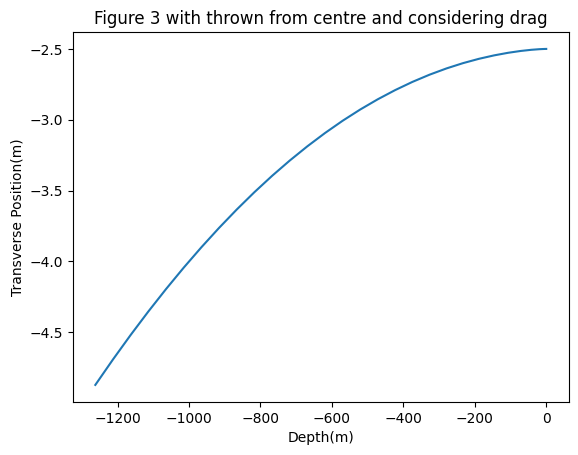

In [63]:
#Part(d) 
a = 0.004
tf = 100
t = np.linspace(0,tf,101)
soln = solve_ivp(fun = dragproj_2,
                          t_span=(0,tf), # tuple
                          y0=[yx0,yy0,vx0,vy0], #as an arrray
                          args=(a,g0,2,re,omega),
                          t_eval = t ,events=[bottom,wall]
                      ) 
yx,yy,vx,vy = soln.y[0],soln.y[1],soln.y[2],soln.y[3]
t = soln.t 
fig,ax = plt.subplots() 
ax.plot(yy,yx,) 
ax.set_xlabel("Depth(m)") 
ax.set_ylabel("Transverse Position(m)") 
ax.set_title("Figure 3 with thrown from centre and considering drag"); 

In [52]:
print("After turning the drag on, it seems that the mass hits the bottom of the shaft even sooner with the drag on and is only able to reach depth of 1200")

After turning the drag on, it seems that the mass hits the bottom of the shaft even sooner with the drag on and is only able to reach depth of 1200


## Part 4

[array([1266.47346956, 3798.79582661]), array([   0.        , 2532.61201473, 5065.08265064])]


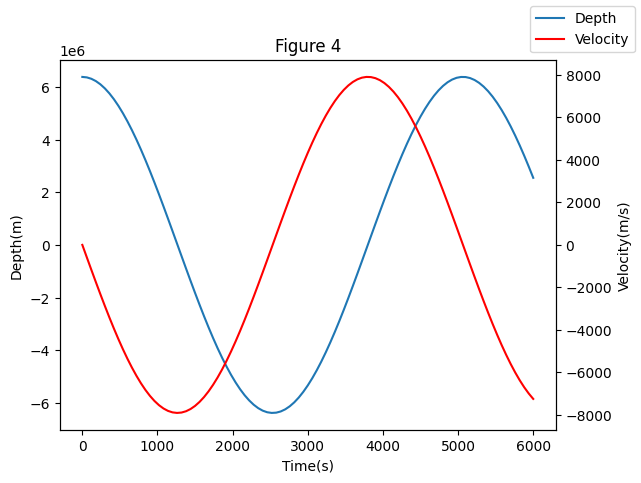

In [65]:
#Part(a)
def dragproj_1(t,s,a,g0,gamma,Re,y0):
    y,v = s
    dydt = v
    g = (g0*(y/Re)) 
    dvdt = -g+a*(v**gamma)
    return [dydt,dvdt] 

def reaching(t,s,a,g0,gamma,Re,y0):
    y,v = s
    return y

def end(t,s,a,g0,gamma,Re,y0):
    y,v = s
    return v
y0 = re  
a = 0
end.direction = 0 
end.terminal = False
tf = 6000
n=101
t = np.linspace(t0,tf,n)
soln = solve_ivp(fun = dragproj_1,
                          t_span=(0,tf), # tuple
                          y0=[y0,0], #as an arrray
                          args=(a,g0,2,re,y0),
                          t_eval = t,events=[reaching,end]
                      )
y,v = soln.y
t = soln.t 
fig,ax = plt.subplots() 
ax.plot(t,y,label="Depth"); 
ax.set_xlabel("Time(s)"); 
ax.set_ylabel("Depth(m)"); 
ax.set_title("Figure 4"); 
ax1 = ax.twinx() 
ax1.plot(t,v,'red',label="Velocity"); 
fig.legend() 
print(soln.t_events)
ax1.set_ylabel("Velocity(m/s)");

## Part 5

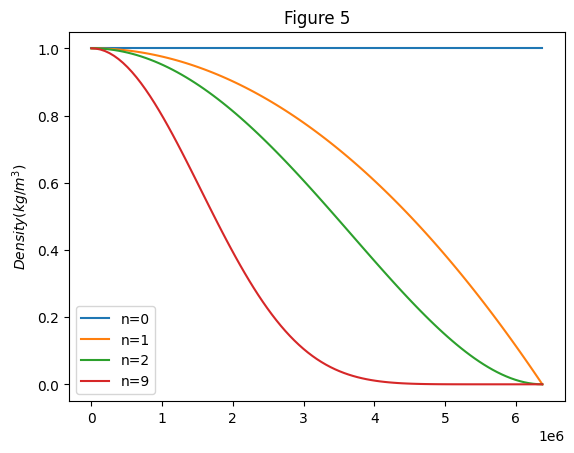

In [97]:
#Part(a)
def density(r,i,R,pn):
    p = pn*((1-(r/R)**2)**i)
    return p 

r0 = 0 
rf = re 
n = 101
r = np.linspace(r0,rf,n) 
pn = 1
fig,ax = plt.subplots()
i = [0,1,2,9]
labels = ["n=0","n=1","n=2","n=9"]
for a in [0,1,2,3]:
    dense = density(r,i[a],re,pn)
    ax.plot(r,dense,label=labels[a]); 

ax.legend();
ax.set_label("Radius(m)"); 
ax.set_ylabel("$Density(kg/m^3)$"); 
ax.set_title("Figure 5");

C:\Users\dudde\AppData\Local\Temp\ipykernel_24040\608389428.py:27: RuntimeWarning: divide by zero encountered in divide
  F = (G/(r**2))*(quad(dm,r0,rr,args=(i,R,pn))[0])


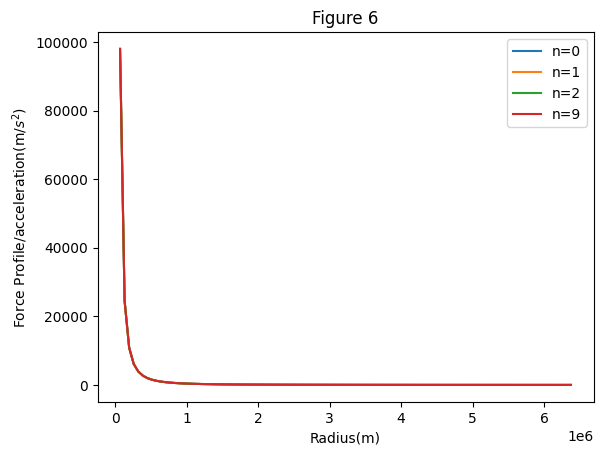

In [98]:
from scipy.integrate import quad
G = 6.6743e-11
Me = 5.972e24 
i = [0,1,2,9]
r0 = 0
rf = re
n=101
r = np.linspace(r0,rf,n)
def dm(r,i,R,pn):
    dmdr = 4*np.pi*(r**2)*pn*((1-(r/R)**2)**i)
    return dmdr
def pnv(r,i,R,M):
    pn=[0,0,0,0]
    i = [0,1,2,9]
    for a in [0,1,2,3]:
        M1 = quad(dm,r0,re,args=(i[a],R,1))[0]
        pn[a] = Me/M1
    return pn
pn = 1
pn1 = pnv(r,i,re,Me)

def f(r,G,i,R,pn):
    for rr in r: 
        if(rr == 0):
            F = 0
        else:
            F = (G/(r**2))*(quad(dm,r0,rr,args=(i,R,pn))[0])
    return F


fig,ax = plt.subplots()
for a in [0,1,2,3]:
    i = [0,1,2,9]
    F1 = f(r,G,i[a],re,pn1[a])
    ax.plot(r,F1,label=labels[a])

ax.legend()  
ax.set_xlabel("Radius(m)");
ax.set_ylabel("Force Profile/acceleration(m/$s^2$)");
ax.set_title("Figure 6");

1623841.1532695387
[array([], dtype=float64), array([0.])]


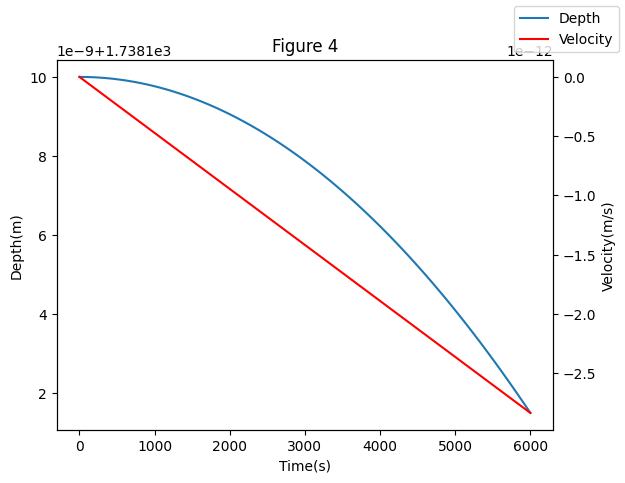

In [101]:
def dragproj_1(t,s,a,g0,gamma,Re,y0):
    y,v = s
    dydt = v
    g = (g0*(y/Re)) 
    dvdt = -g+a*(v**gamma)
    return [dydt,dvdt] 

def reaching(t,s,a,g0,gamma,Re,y0):
    y,v = s
    return y

def end(t,s,a,g0,gamma,Re,y0):
    y,v = s
    return v
y0 = rm  
a = 0
end.direction = 0 
end.terminal = False
tf = 6000
n=101
g = G * mm/rm**2
print(g)
t = np.linspace(0,tf,n)
soln = solve_ivp(fun = dragproj_1,
                          t_span=(0,tf), # tuple
                          y0=[y0,0], #as an arrray
                          args=(a,g,2,me,y0),
                          t_eval = t,events=[reaching,end]
                      )
y,v = soln.y
t = soln.t 
fig,ax = plt.subplots() 
ax.plot(t,y,label="Depth"); 
ax.set_xlabel("Time(s)"); 
ax.set_ylabel("Depth(m)"); 
ax.set_title("Figure 4"); 
ax1 = ax.twinx() 
ax1.plot(t,v,'red',label="Velocity"); 
fig.legend() 
print(soln.t_events)
ax1.set_ylabel("Velocity(m/s)");